## lab 5

In [1]:
import pandas as pd
import numpy as np
import string
import random
import sys
import statistics as stat
from matplotlib import pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics, datasets
from sklearn.multiclass import OneVsRestClassifier


import seaborn as sns

sns.set(style='whitegrid')

plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (25, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [2]:
df = pd.read_csv(
    'iris-data.csv',
    sep=',',
    names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
)
df.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [3]:
def holdout(data: pd.core.frame.DataFrame, train_to_test_ratio: float, columns: list = [], split_method: string = 'natural'):
    if(split_method != 'natural' and split_method != 'shuffle'):
        raise ValueError("split metod must be either 'natural' or 'shuffle'")
        
    if len(list(columns)) > 0: 
        new_df = data.filter(list(columns), axis=1)
    else:
        new_df = data.copy()
        
    filter_size = int(len(data) * train_to_test_ratio);
    
    if(split_method == 'natural'):
        return new_df[new_df.index <= filter_size], new_df[new_df.index > filter_size]
        
    if (split_method == 'shuffle'):
        arr = np.arange(0, len(data))
        np.random.shuffle(arr)
        return new_df[new_df.index.isin(arr[0:filter_size])], new_df[new_df.index.isin(arr[filter_size + 1:-1])]

In [4]:
train, test = holdout(df, 0.5, [],  'shuffle')
train.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa

In [5]:
train.describe()

sepal-length  sepal-width  petal-length  petal-width
count     75.000000    75.000000     75.000000    75.000000
mean       5.816000     3.014667      3.668000     1.118667
std        0.842621     0.460227      1.756391     0.726281
min        4.300000     2.000000      1.000000     0.100000
25%        5.050000     2.750000      1.500000     0.300000
50%        5.800000     3.000000      4.100000     1.300000
75%        6.350000     3.300000      4.900000     1.650000
max        7.900000     4.200000      6.900000     2.500000

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

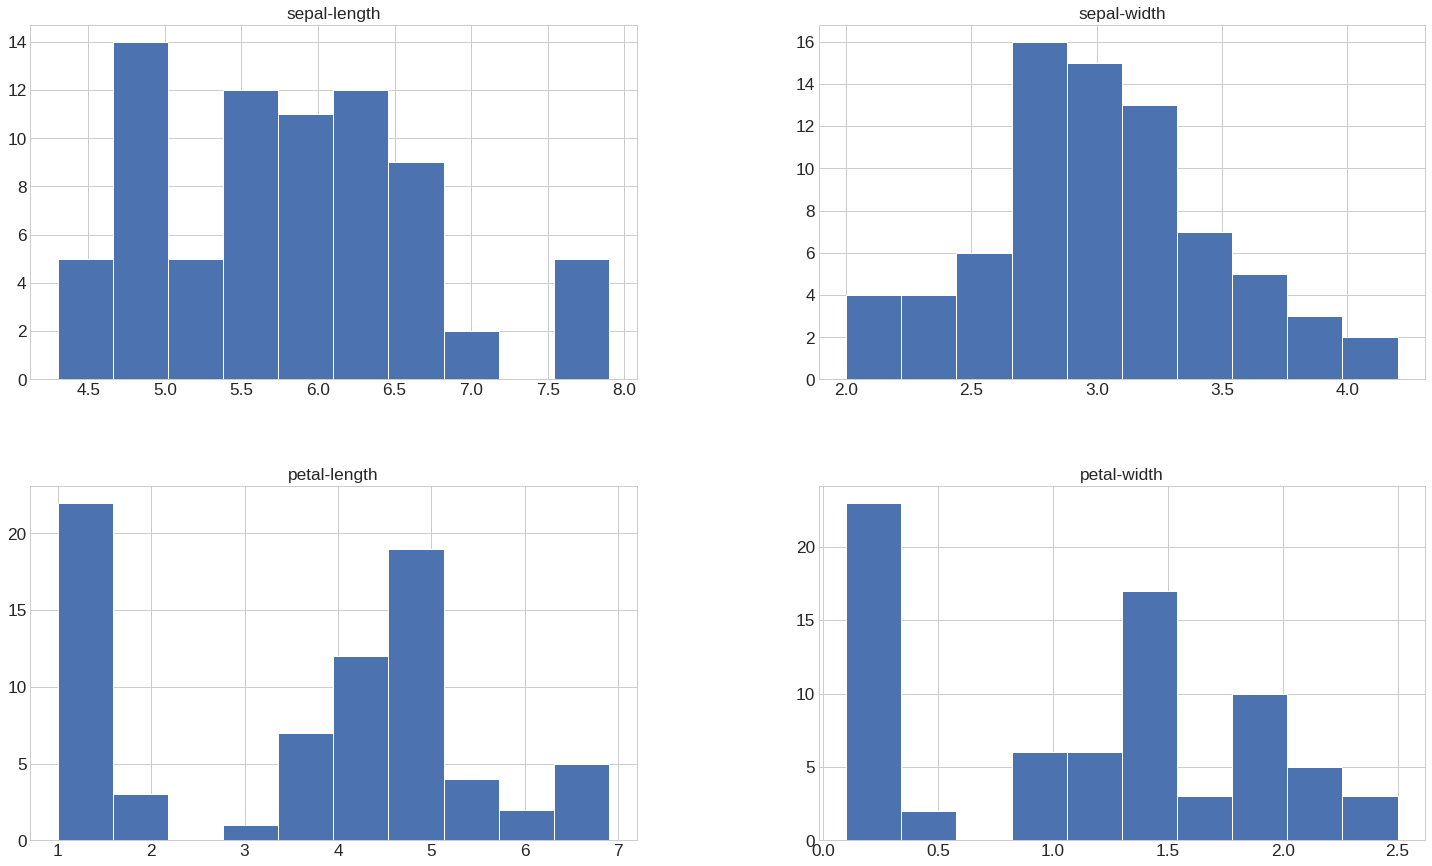

In [6]:
train.hist()

In [7]:
test.head()

sepal-length  sepal-width  petal-length  petal-width        class
1            4.9          3.0           1.4          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa

In [8]:
test.describe()

sepal-length  sepal-width  petal-length  petal-width
count     73.000000    73.000000     73.000000    73.000000
mean       5.854795     3.082192      3.857534     1.282192
std        0.816333     0.395581      1.760360     0.790102
min        4.400000     2.300000      1.300000     0.100000
25%        5.100000     2.900000      1.600000     0.400000
50%        5.700000     3.000000      4.400000     1.400000
75%        6.400000     3.300000      5.400000     1.900000
max        7.700000     4.400000      6.300000     2.500000

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

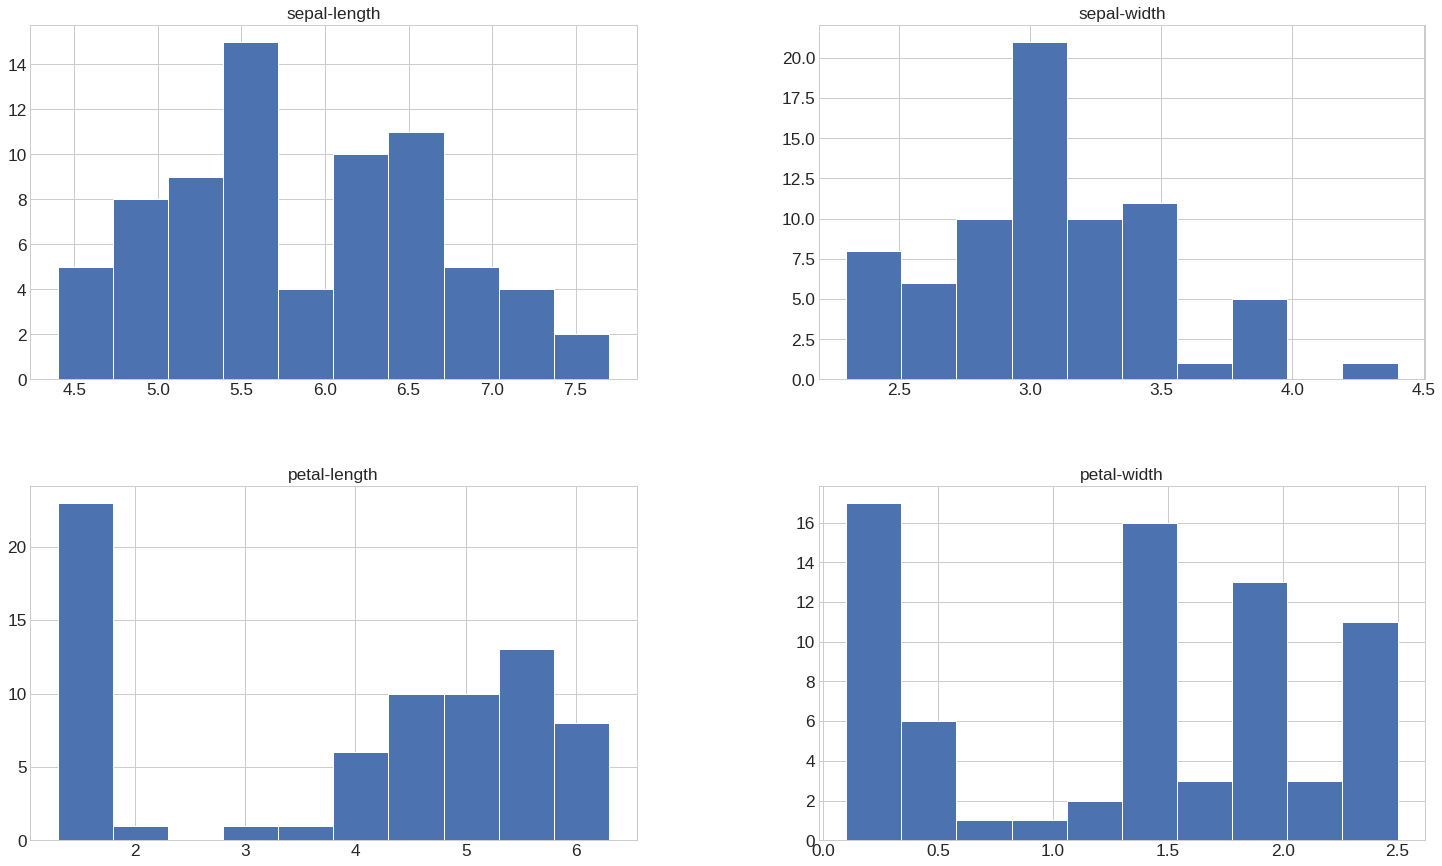

In [9]:
test.hist()

In [10]:
train, test = holdout(df, 0.5, [], 'natural')
train.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [11]:
train.describe()

sepal-length  sepal-width  petal-length  petal-width
count     76.000000    76.000000     76.000000    76.000000
mean       5.357895     3.201316      2.439474     0.621053
std        0.650387     0.476233      1.391793     0.546093
min        4.300000     2.000000      1.000000     0.100000
25%        4.900000     2.975000      1.400000     0.200000
50%        5.150000     3.200000      1.600000     0.300000
75%        5.725000     3.500000      4.000000     1.300000
max        7.000000     4.400000      4.900000     1.800000

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

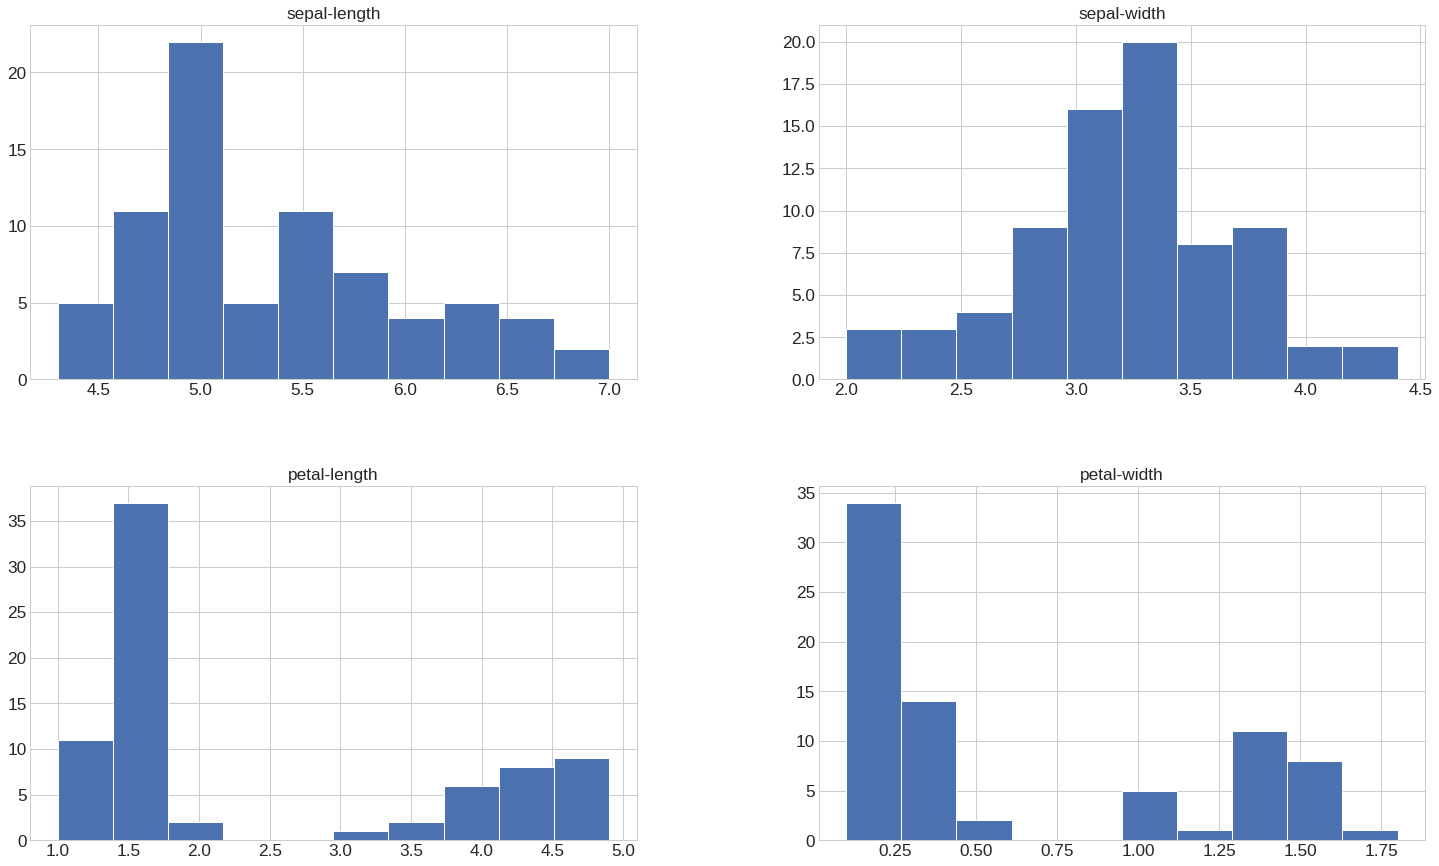

In [12]:
train.hist()

In [13]:
test.head()

sepal-length  sepal-width  petal-length  petal-width            class
76           6.8          2.8           4.8          1.4  Iris-versicolor
77           6.7          3.0           5.0          1.7  Iris-versicolor
78           6.0          2.9           4.5          1.5  Iris-versicolor
79           5.7          2.6           3.5          1.0  Iris-versicolor
80           5.5          2.4           3.8          1.1  Iris-versicolor

In [14]:
test.describe()

sepal-length  sepal-width  petal-length  petal-width
count     74.000000    74.000000     74.000000    74.000000
mean       6.341892     2.902703      5.113514     1.791892
std        0.683866     0.323920      0.831622     0.422243
min        4.900000     2.200000      3.000000     1.000000
25%        5.800000     2.700000      4.500000     1.425000
50%        6.300000     2.900000      5.100000     1.800000
75%        6.700000     3.075000      5.675000     2.100000
max        7.900000     3.800000      6.900000     2.500000

array([[<AxesSubplot:title={'center':'sepal-length'}>,
        <AxesSubplot:title={'center':'sepal-width'}>],
       [<AxesSubplot:title={'center':'petal-length'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

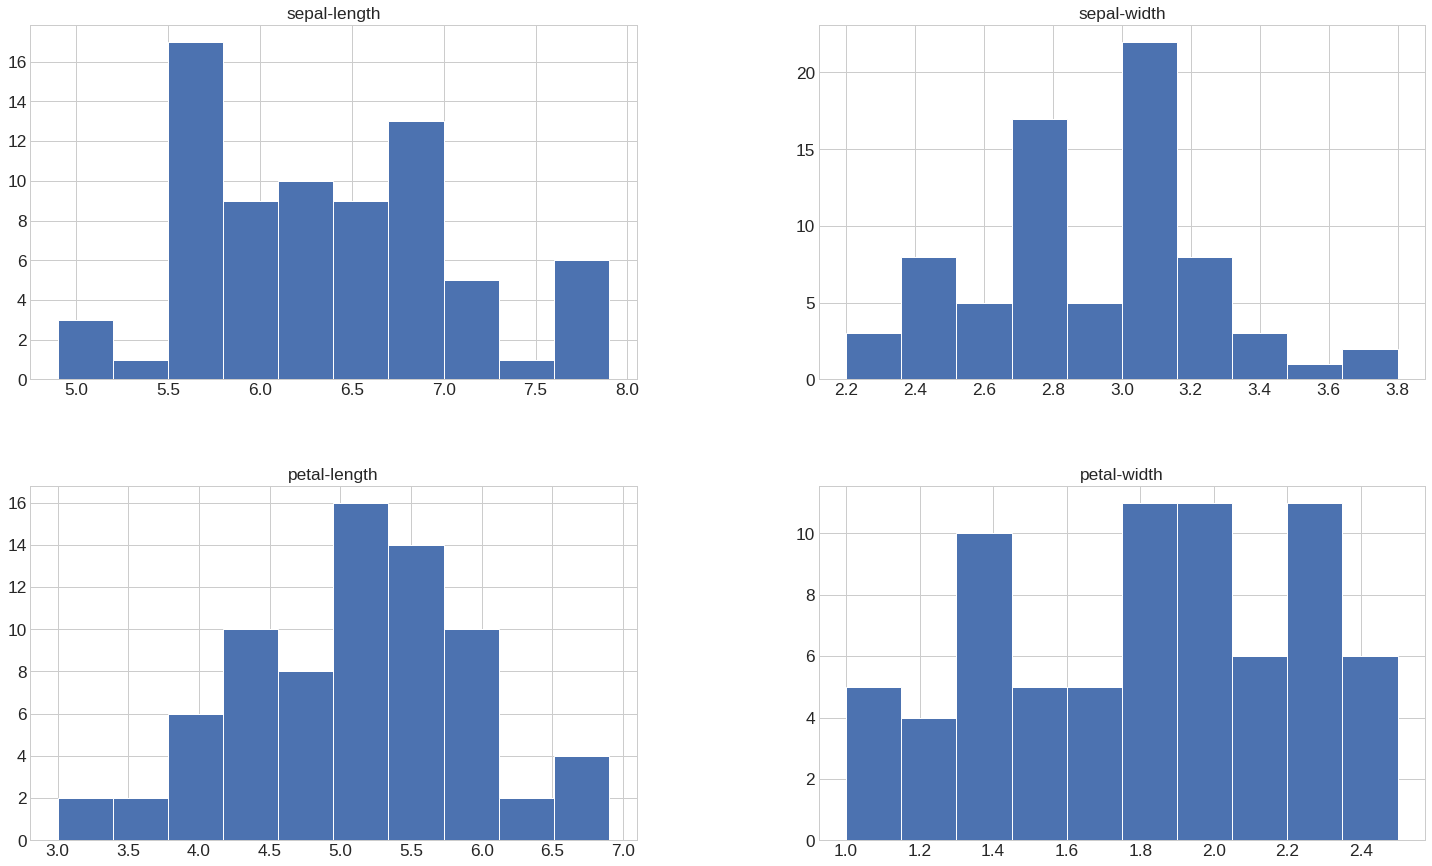

In [15]:
test.hist()

In [16]:
train, test = holdout(df, 0.5, ['sepal-width', 'petal-width'], 'natural')
train.head()

sepal-width  petal-width
0          3.5          0.2
1          3.0          0.2
2          3.2          0.2
3          3.1          0.2
4          3.6          0.2

In [17]:
train.describe()

sepal-width  petal-width
count    76.000000    76.000000
mean      3.201316     0.621053
std       0.476233     0.546093
min       2.000000     0.100000
25%       2.975000     0.200000
50%       3.200000     0.300000
75%       3.500000     1.300000
max       4.400000     1.800000

array([[<AxesSubplot:title={'center':'sepal-width'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

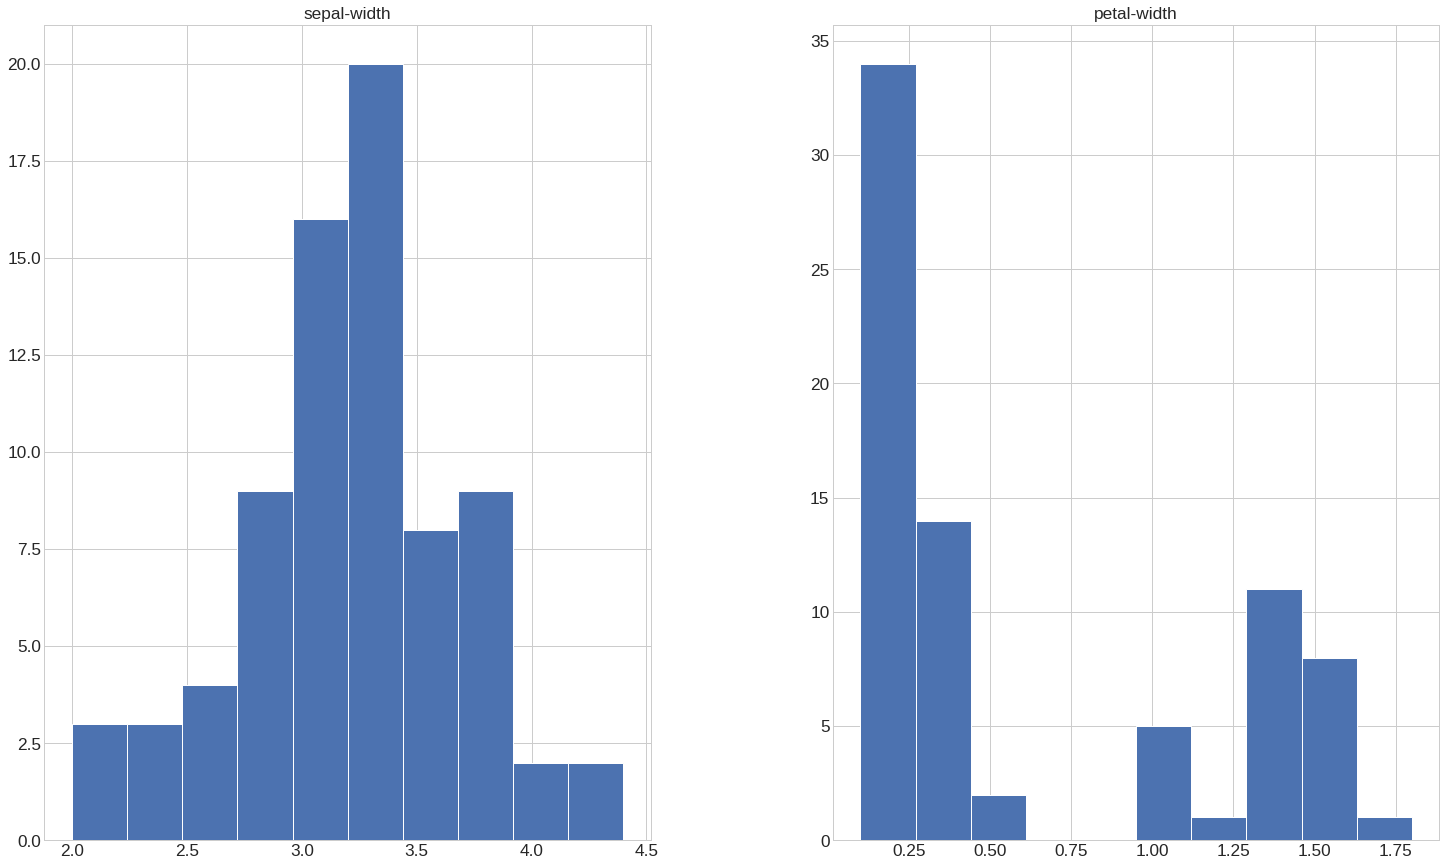

In [18]:
train.hist()

In [19]:
test.describe()

sepal-width  petal-width
count    74.000000    74.000000
mean      2.902703     1.791892
std       0.323920     0.422243
min       2.200000     1.000000
25%       2.700000     1.425000
50%       2.900000     1.800000
75%       3.075000     2.100000
max       3.800000     2.500000

array([[<AxesSubplot:title={'center':'sepal-width'}>,
        <AxesSubplot:title={'center':'petal-width'}>]], dtype=object)

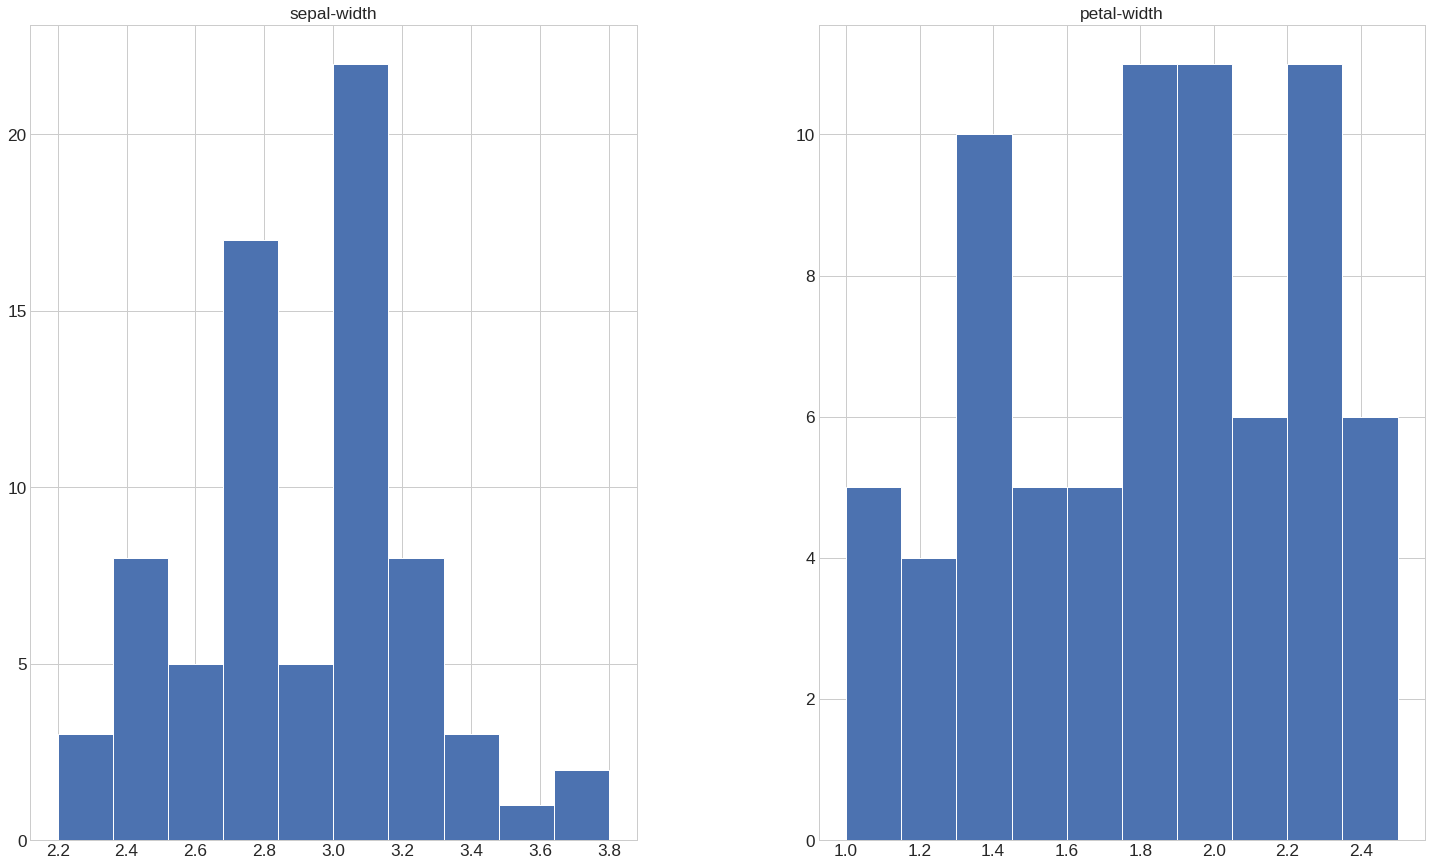

In [20]:
test.hist()

In [21]:
def kfold(data: pd.core.frame.DataFrame, parts: int, pick_part:int, columns: list = [], split_method: string = 'natural'):
    if(split_method != 'natural' and split_method != 'shuffle'):
        raise ValueError("split metod must be either 'natural' or 'shuffle'")
    if(pick_part > parts):
        raise ValueError("pick part must be within parts")
        
    if len(list(columns)) > 0: 
        new_df = data.filter(list(columns), axis=1)
    else:
        new_df = data.copy()
        
    arr = np.arange(len(data))
    
    if(split_method == 'natural'):
        train_dfs = []
        arr = np.split(arr, parts)
        for idx, ar in enumerate(arr):
            train_dfs.append(new_df[new_df.index.isin(ar)])
        pick_df = train_dfs.pop(pick_part)
            
        return train_dfs, pick_df
        
    if (split_method == 'shuffle'):
        train_dfs = []
        np.random.shuffle(arr)
        arr = np.split(arr, parts)
        for idx, ar in enumerate(arr):
            train_dfs.append(new_df[new_df.index.isin(ar)])
            
        return train_dfs[0:-1], train_dfs[-1]

In [22]:
train, test = kfold(df, 10, 0, [], 'natural')
for idx, dataset in enumerate(train):
    print(dataset.head())

    sepal-length  sepal-width  petal-length  petal-width        class
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa
    sepal-length  sepal-width  petal-length  petal-width        class
30           4.8          3.1           1.6          0.2  Iris-setosa
31           5.4          3.4           1.5          0.4  Iris-setosa
32           5.2          4.1           1.5          0.1  Iris-setosa
33           5.5          4.2           1.4          0.2  Iris-setosa
34           4.9          3.1           1.5          0.1  Iris-setosa
    sepal-length  sepal-width  petal-length  petal-width        class
45           4.8          3.0           1.4          0.3  Iris-setosa
46           5.1    

In [23]:
test

sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3          3.0           1.1          0.1  Iris-setosa
14           5.8          4.0           1.2          0.2  Iris-setosa

In [24]:
def kfold_full_set(data: pd.core.frame.DataFrame, parts: int, columns: list = [], split_method: string = 'natural'):
    dfs = []
    for i in range(parts):
        train, test = kfold(df, 10, i, [], 'natural')
        dfs.append([train, test])
    return dfs

In [25]:
dfs = kfold_full_set(df, 10, [], 'natural')
print(dfs[0][0][0].head())
print(dfs[0][1].head())

    sepal-length  sepal-width  petal-length  petal-width        class
15           5.7          4.4           1.5          0.4  Iris-setosa
16           5.4          3.9           1.3          0.4  Iris-setosa
17           5.1          3.5           1.4          0.3  Iris-setosa
18           5.7          3.8           1.7          0.3  Iris-setosa
19           5.1          3.8           1.5          0.3  Iris-setosa
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [26]:
def loo(data: pd.core.frame.DataFrame, excluded_data: pd.core.frame.DataFrame, columns: list = []):
    if len(list(columns)) > 0: 
        new_df = data.filter(list(columns), axis=1)
    else:
        new_df = data.copy()
        
    return data.drop(excluded_data.index)

In [27]:
test = df[df.index < 55]
train = loo(df, test, [])
train

sepal-length  sepal-width  petal-length  petal-width            class
55            5.7          2.8           4.5          1.3  Iris-versicolor
56            6.3          3.3           4.7          1.6  Iris-versicolor
57            4.9          2.4           3.3          1.0  Iris-versicolor
58            6.6          2.9           4.6          1.3  Iris-versicolor
59            5.2          2.7           3.9          1.4  Iris-versicolor
..            ...          ...           ...          ...              ...
145           6.7          3.0           5.2          2.3   Iris-virginica
146           6.3          2.5           5.0          1.9   Iris-virginica
147           6.5          3.0           5.2          2.0   Iris-virginica
148           6.2          3.4           5.4          2.3   Iris-virginica
149           5.9          3.0           5.1          1.8   Iris-virginica

[95 rows x 5 columns]

## Binary classification

In [28]:
binary_samples = [0,0,1,0,1,0,0,1,1,1,0,1]
target_scores = [-0.6,0.9,1.3,0.6,5,-2,0,1,1.5,3,0.2,5]

In [29]:
fpr, tpr, _ = metrics.roc_curve(binary_samples, target_scores)
roc_auc_score = metrics.roc_auc_score(binary_samples, target_scores)

print('AUC: {}'.format(roc_auc_score))

AUC: 1.0


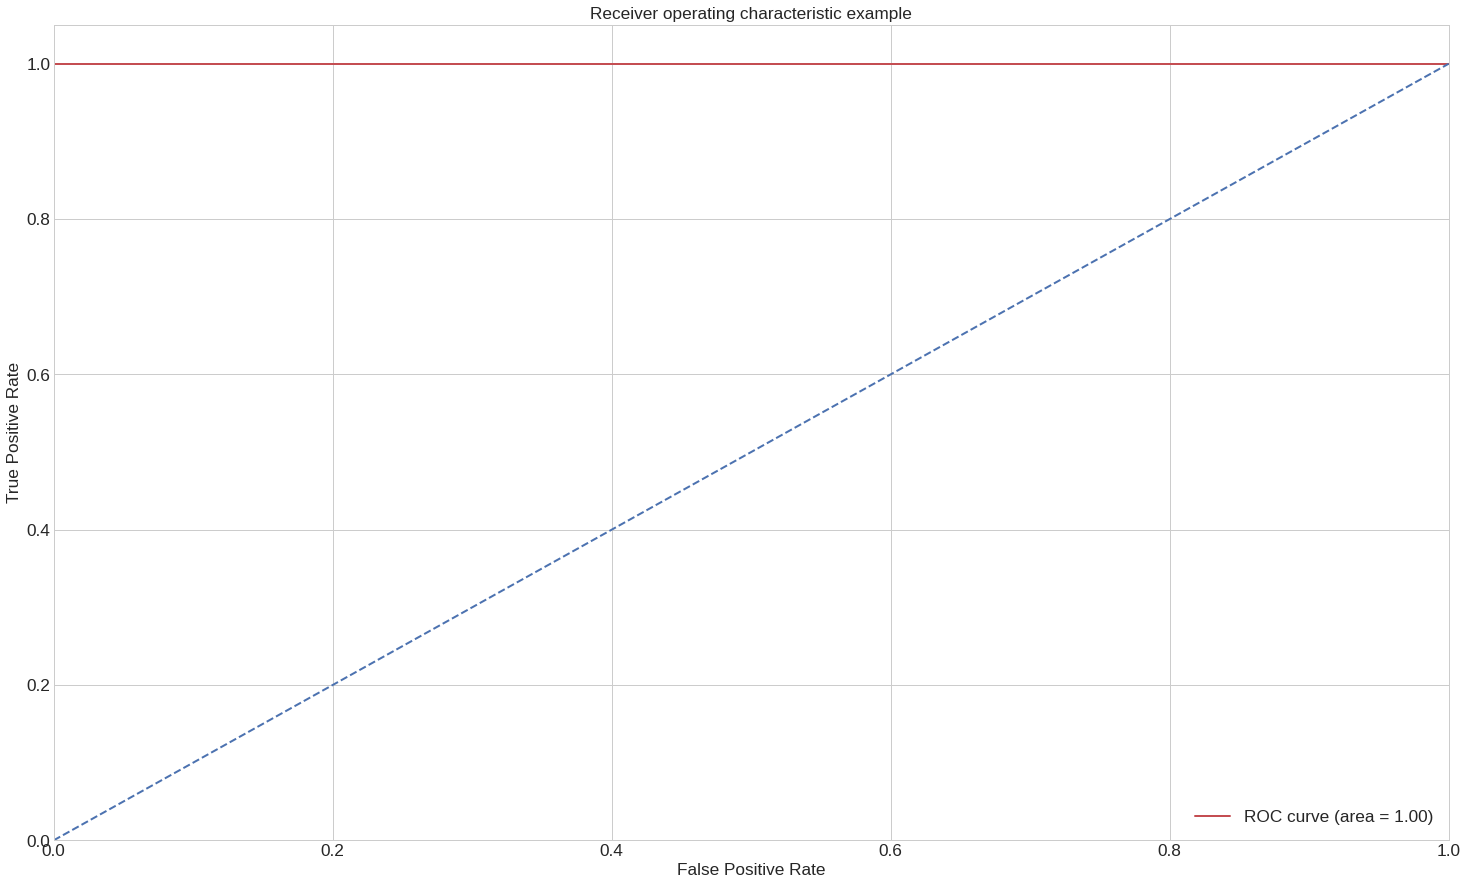

In [30]:
plt.plot(fpr, tpr, color='r',lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

Confusion matrix, without normalization
[[21  0  0]
 [ 0 18 12]
 [ 0  2 22]]
Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         0.6        0.4       ]
 [0.         0.08333333 0.91666667]]


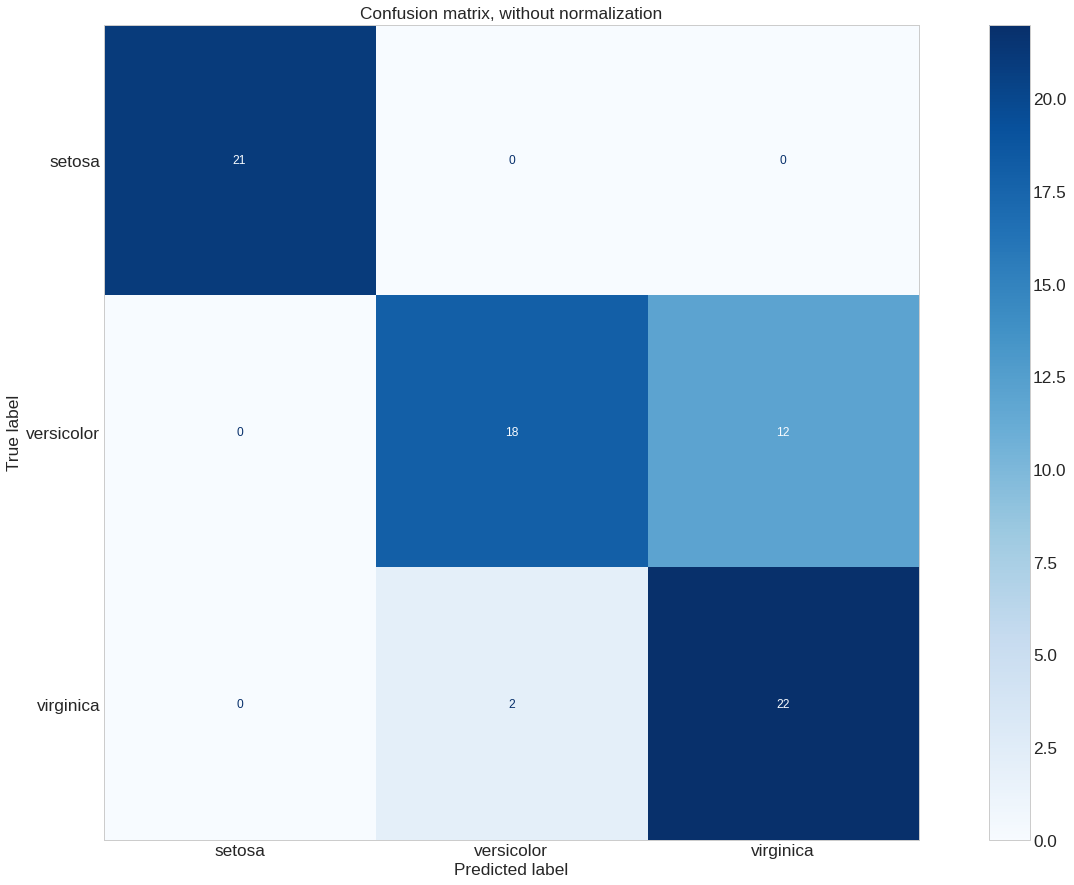

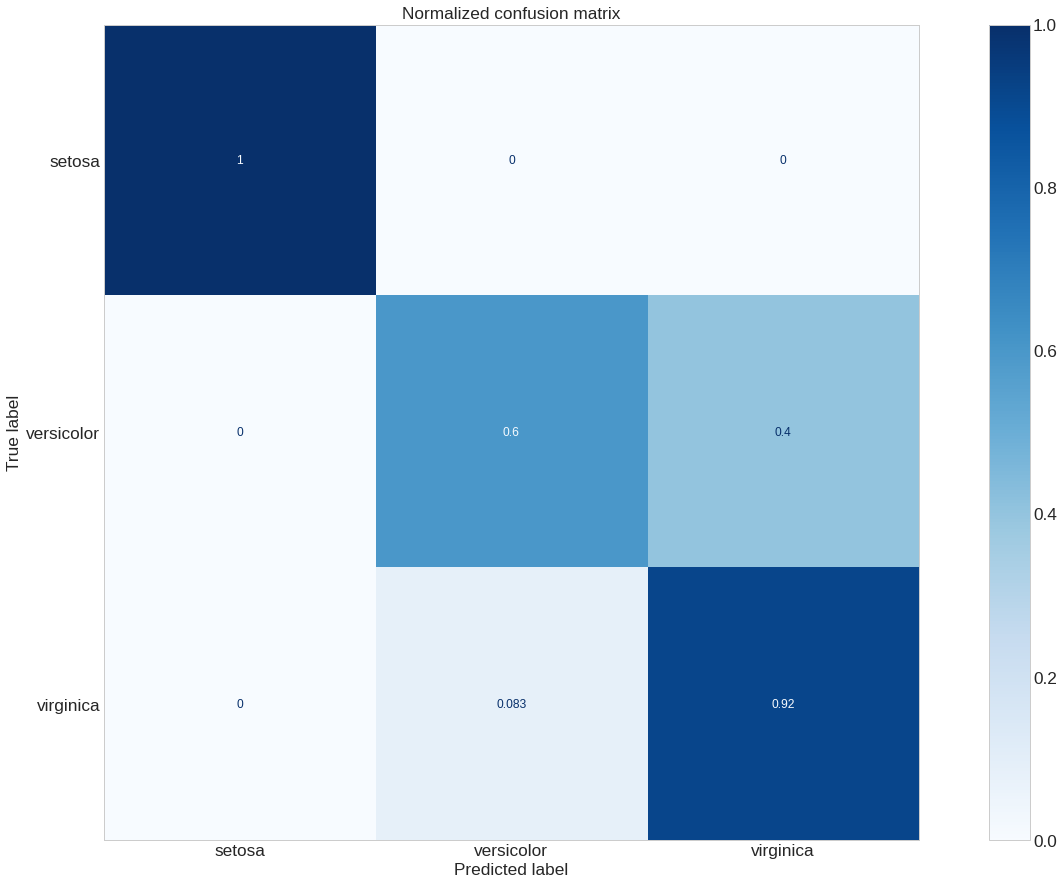

In [31]:
df = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=.5, random_state=0)

random_state = np.random.RandomState(0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))

y_score = classifier.fit(X_train, y_train).decision_function(X_test)

class_names = df.target_names
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    disp.ax_.grid(False)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Plot ROC Curve

In [32]:
def plot_roc_curve(y_test, y_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
    plt.plot(fpr, tpr, color='darkorange',lw=2, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

    plt.grid(False)
    plt.show()

In [33]:
def find_best_threshold(test, score):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)

    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i)})
    roc.iloc[(roc.tf - 0).abs().argsort()[:1]]
    
    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(roc['tpr'])
    plt.plot(roc['1-fpr'], color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    
    return thresholds[np.argmin(abs(tpr - (1 - fpr)))]

In [34]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Make it a binary classification problem by removing the third class
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape

# Add noisy features to make the problem harder
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
random_state = np.random.RandomState(0)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

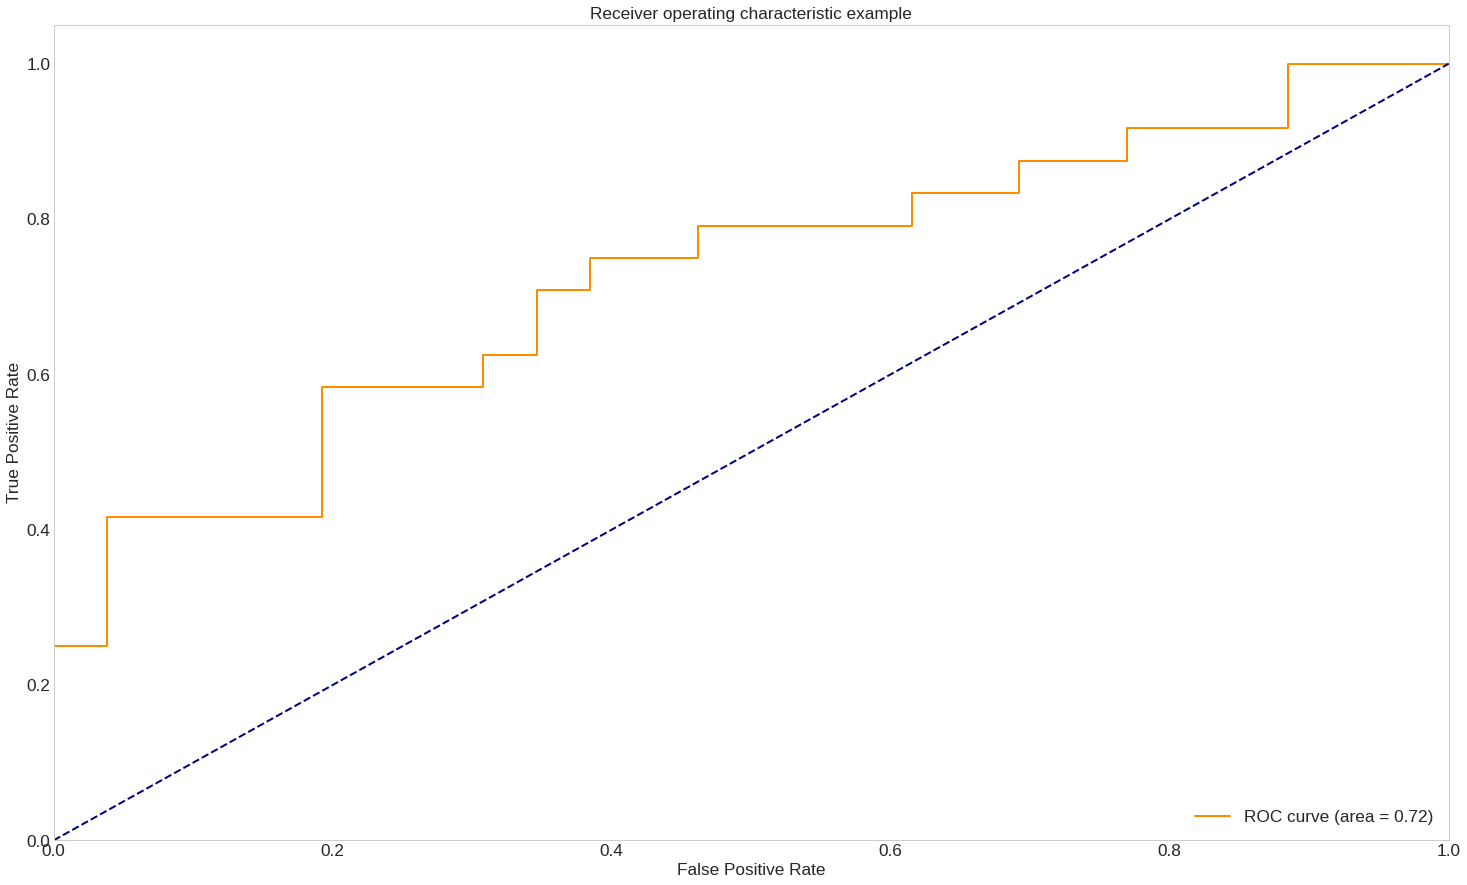

In [35]:
plot_roc_curve(y_test, y_score)

0.04801509846893165

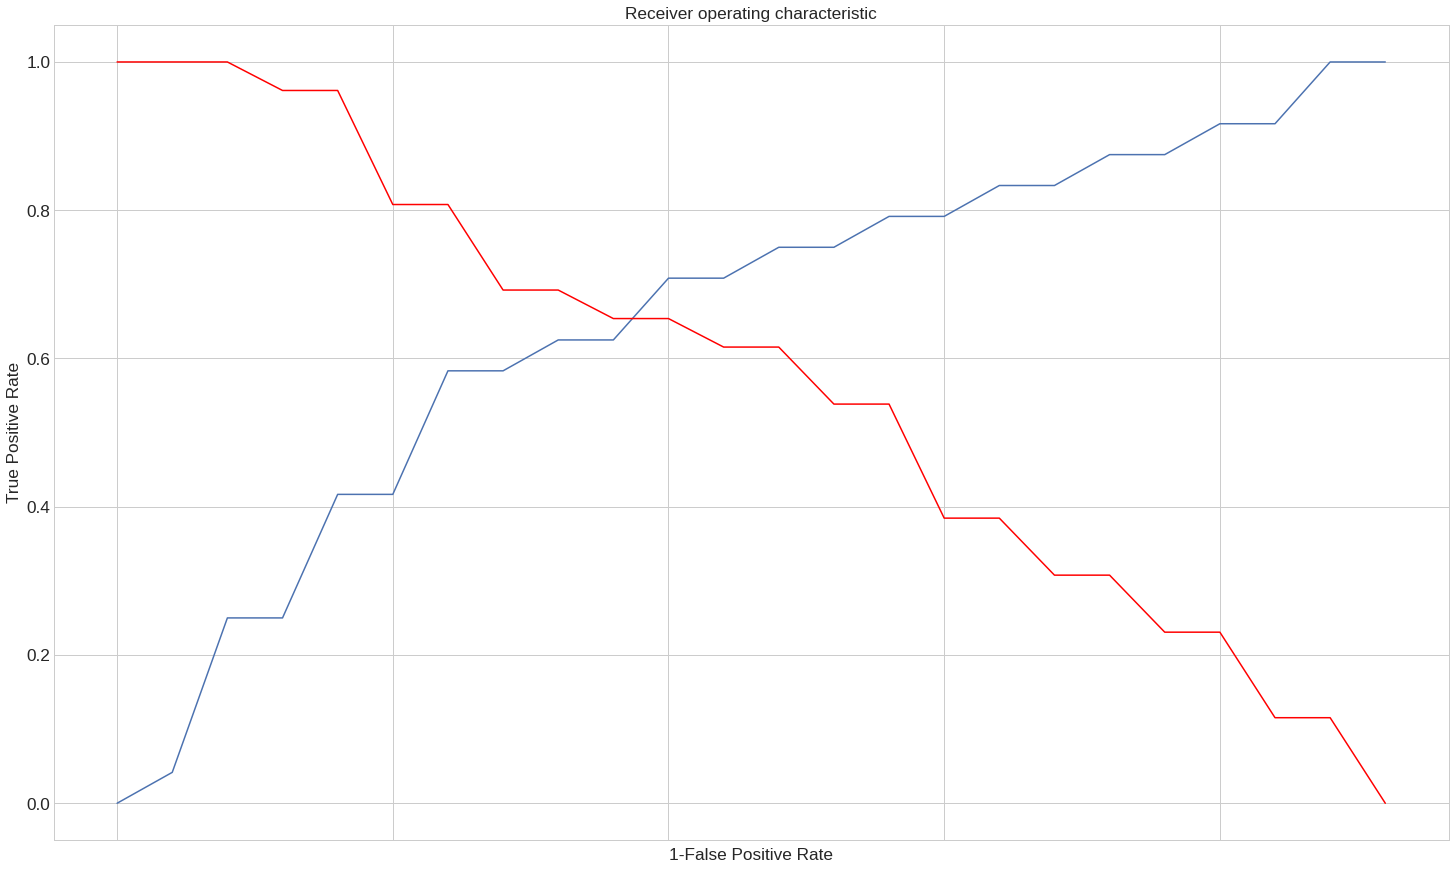

In [36]:
find_best_threshold(y_test, y_score)

## Regression - MSE, MAE

In [37]:
df = pd.read_csv(
    'student_scores.csv',
    sep=','
)
df

Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86

In [38]:
df.describe()

Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

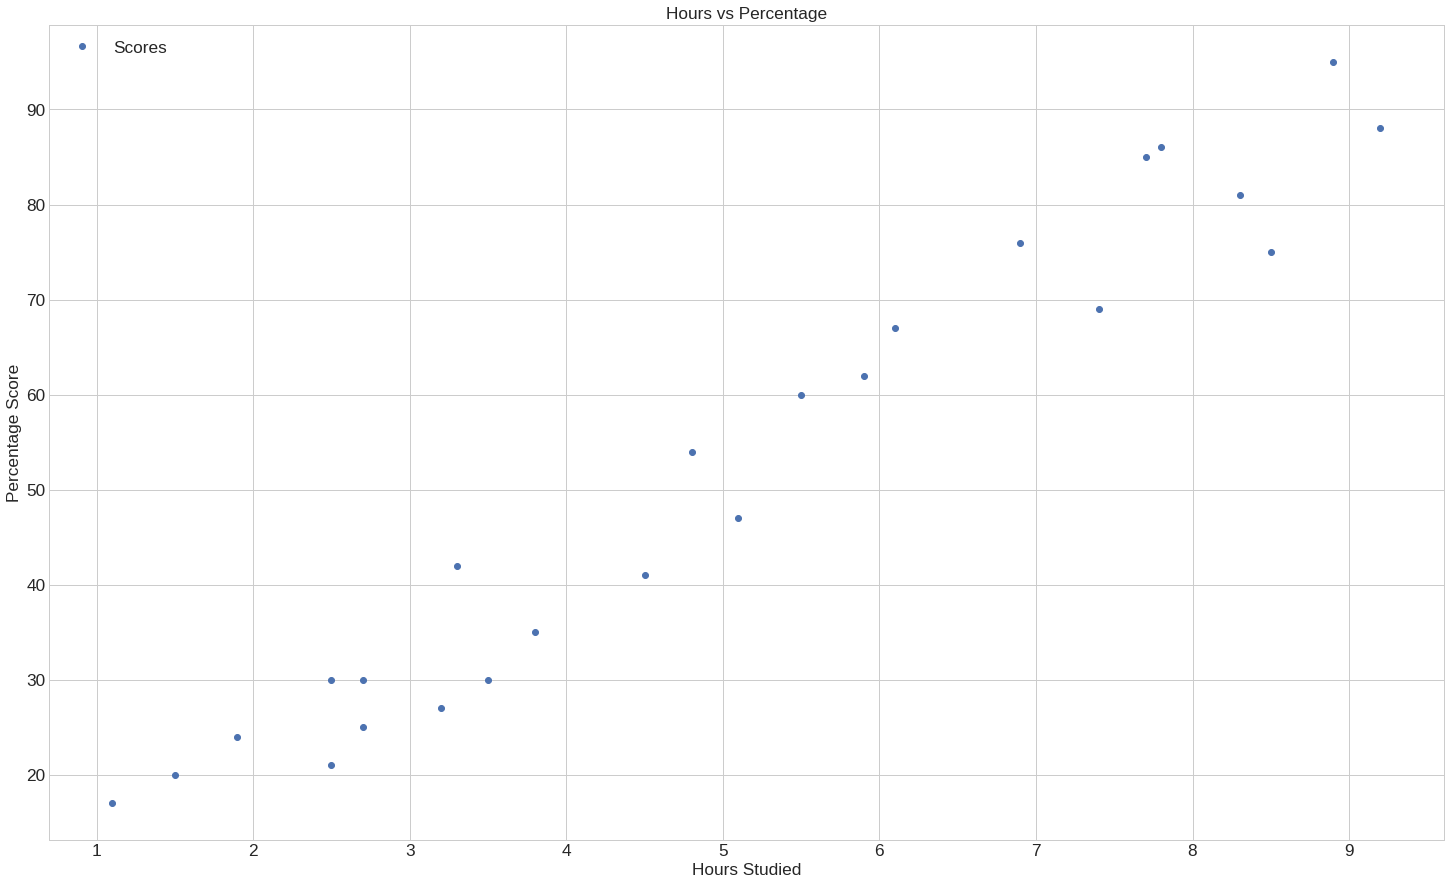

In [39]:
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [40]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)

2.018160041434662
[9.91065648]


In [41]:
regression_df = pd.DataFrame({'x': X_test.flatten(), 'Actual': y_test, 'Predicted': y_pred})
regression_df

x  Actual  Predicted
0  1.5      20  16.884145
1  3.2      27  33.732261
2  7.4      69  75.357018
3  2.5      30  26.794801
4  5.9      62  60.491033

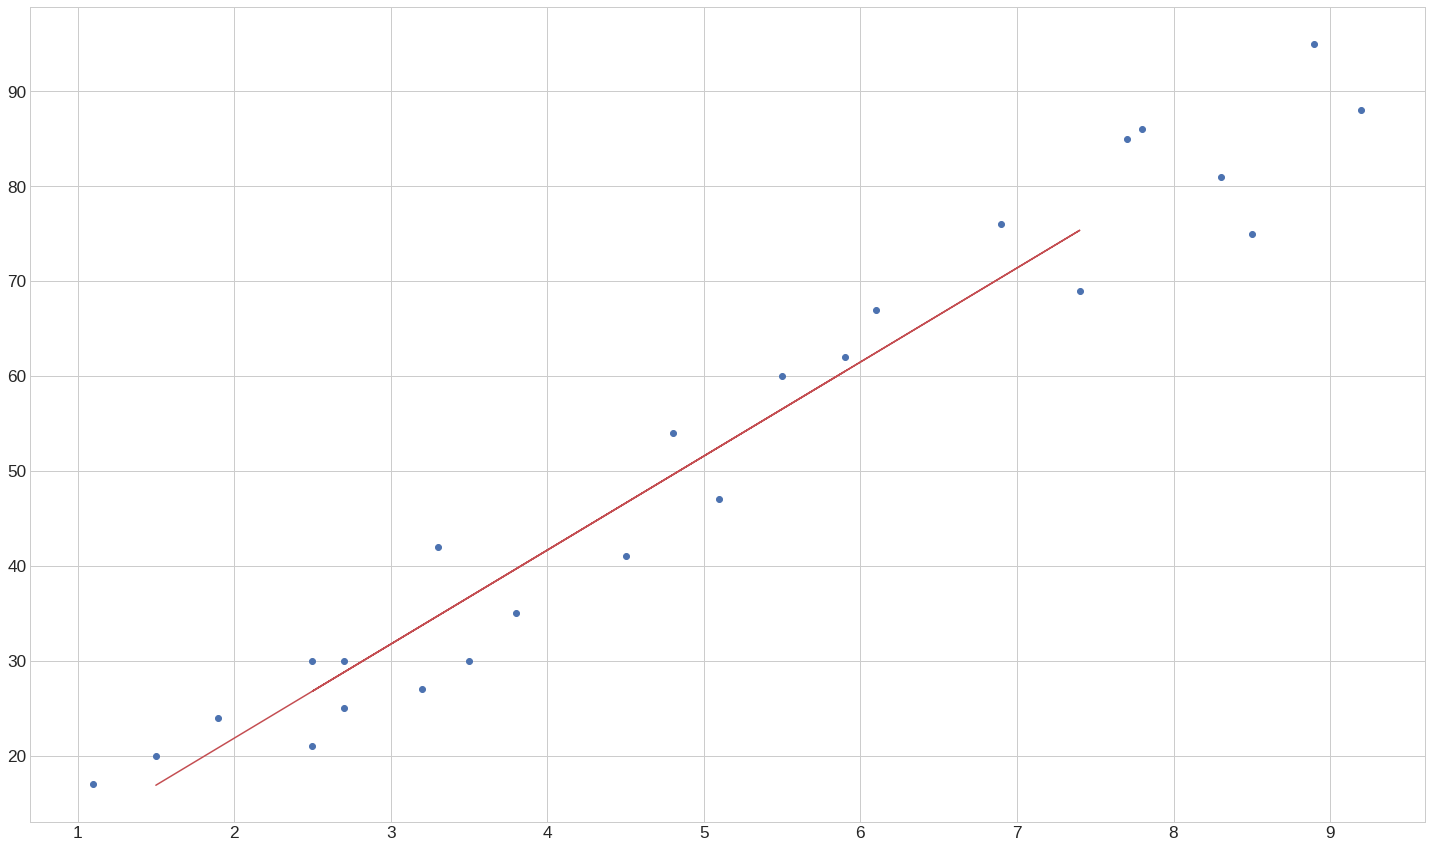

In [42]:
plt.plot(regression_df.x, regression_df.Predicted, color='r')
plt.scatter(df.Hours, df.Scores)
plt.show()

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
